In [1]:
import pandas as pd
import numpy as np

Loading the dataset

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values

In [6]:
df.shape

(284807, 31)

In [7]:
output_val=df['Class'].value_counts()

In [8]:
print("Number of people with normal transactions:", output_val[0])
print("Number of people with fraudulent transactions:", output_val[1])

Number of people with normal transactions: 284315
Number of people with fraudulent transactions: 492


In [9]:
print("Imbalance observed:",output_val[0]/output_val[1])

Imbalance observed: 577.8760162601626


Percentage with no fraud: 99.827251436938
Percentage with fraud: 0.1727485630620034


<Axes: ylabel='Class'>

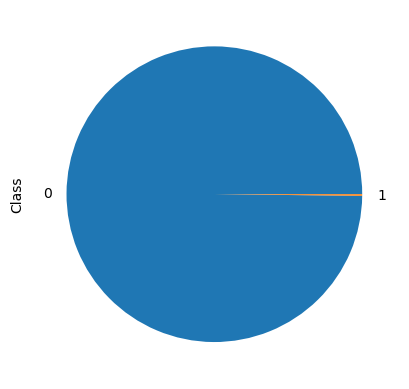

In [10]:
print("Percentage with no fraud:",output_val[0]*100/len(df['Class']))
print("Percentage with fraud:",output_val[1]*100/len(df['Class']))
output_val.plot(kind='pie')

In [11]:
# We can see the data is highly imbalanced splitting it into two separate Dataframes
df_normal=df[df['Class']==0]
df_fraud=df[df['Class']==1]

In [12]:
df_fraud.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.0,1


In [13]:
df_normal.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [14]:
df_fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
df_normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
# Comparing Transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


 Undersampling the dataset

In [17]:
# Fraud Transactions =492
sample_normal=df_normal.sample(n=492)

In [18]:
# Adding Dataframes
df_fin=pd.concat([sample_normal,df_fraud],axis=0)

In [19]:
df_fin.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
21054,31438.0,-1.067501,1.170033,2.150694,2.872176,-0.407371,1.007179,-0.329883,0.749589,-0.924413,...,-0.032618,-0.044229,-0.169565,-0.424439,0.232533,0.307035,0.239155,0.067092,49.14,0
38221,39300.0,1.173502,0.066460,0.480698,0.466128,-0.339230,-0.224708,-0.198226,0.146670,-0.041152,...,-0.191687,-0.613680,0.167362,-0.019354,0.075196,0.110871,-0.024039,0.002899,1.79,0


In [20]:
df_fin['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [21]:
df_fin.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95962.339431,-0.105063,0.089838,-0.027125,-0.063752,-0.007352,-0.017000,-0.014074,0.036045,0.006845,...,0.034569,-0.031020,0.001707,0.037347,0.00321,-0.030149,-0.005169,0.018905,0.013970,79.988699
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

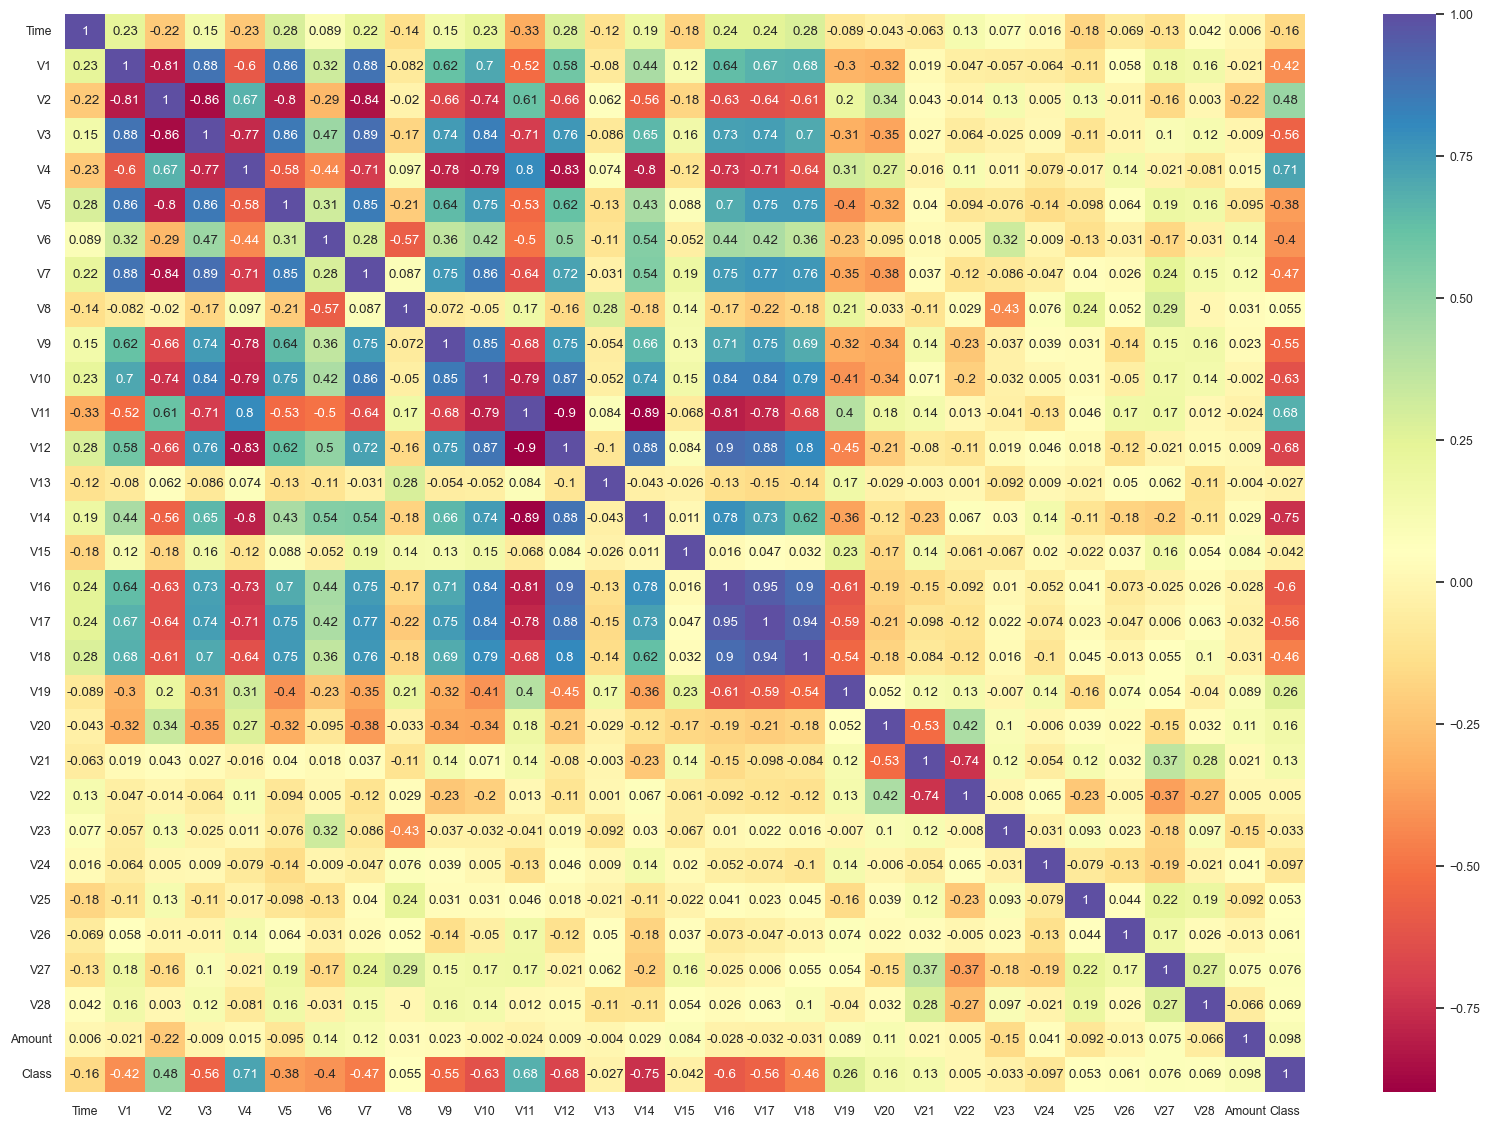

In [23]:
# Checking Correlation
corr= round(df_fin.corr(),3)
plt.figure(figsize=(20,14))
sns.set(font_scale=0.8)
sns.heatmap(corr, cmap = 'Spectral', annot = True)
plt.show()

Text(320.9916666666667, 0.5, 'Amount')

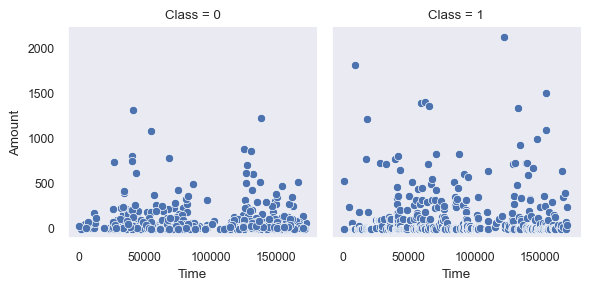

In [24]:
# Analyzing Time and amount
sns.set_style(style="dark")
f_grid=sns.FacetGrid(data=df_fin,col='Class')
f_grid.map(sns.scatterplot,'Time','Amount')
plt.xlabel("Time")
plt.ylabel("Amount")

Text(0.5, 1.0, 'Original dataset')

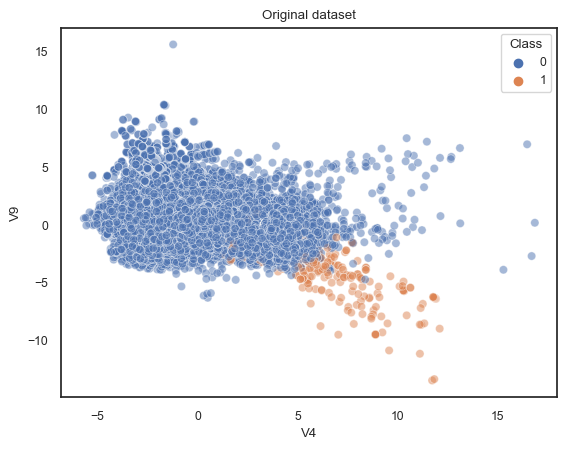

In [25]:
#Checking distribution on original data
sns.set_style(style='white')
sns.scatterplot(data=df, x='V4', y='V9', hue=df['Class'], alpha=0.5)
plt.title('Original dataset')

Text(0.5, 1.0, 'Undersampled dataset')

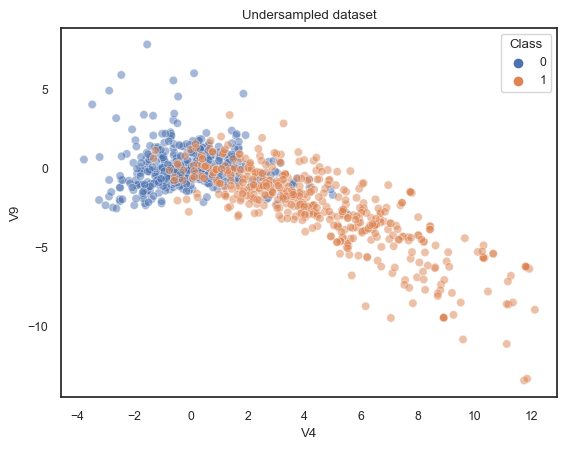

In [26]:
#Checking distribution on undersampled data
sns.set_style(style='white')
sns.scatterplot(data=df_fin, x='V4', y='V9', hue=df_fin['Class'], alpha=0.5)
plt.title('Undersampled dataset')

In [27]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
X=df_fin.drop(columns='Class',axis=1)
y=df_fin['Class']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

In [30]:
# Model Training
model=LogisticRegression()

In [31]:
model.fit(X_train,y_train)

c:\Users\yores\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)

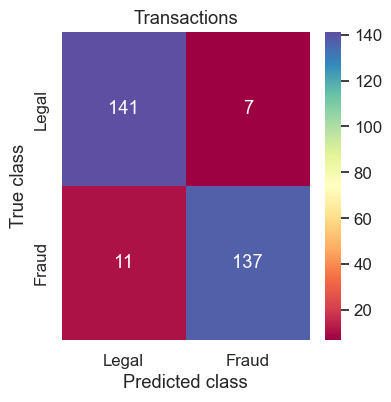

In [33]:
# confusion matrix
LABELS = ['Legal', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cf, xticklabels=LABELS, cmap = 'Spectral', yticklabels=LABELS, annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [34]:
accuracy=accuracy_score(y_test,y_pred)

In [35]:
print("The accuracy of the data is :",accuracy*100)

The accuracy of the data is : 93.91891891891892


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
model2=RandomForestClassifier()

In [38]:
model2.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
y_pred2=model2.predict(X_test)

In [40]:
cf2=confusion_matrix(y_test,y_pred2)

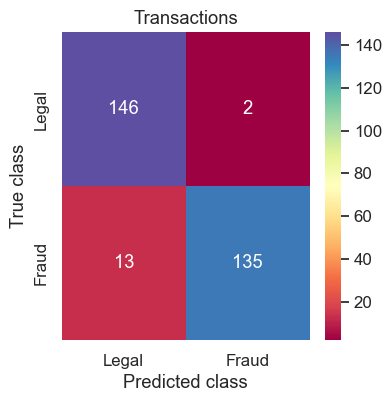

In [41]:
# confusion matrix
LABELS = ['Legal', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cf2, xticklabels=LABELS, cmap = 'Spectral', yticklabels=LABELS, annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [42]:
accuracy2=accuracy_score(y_test,y_pred2)

In [43]:
print("The accuracy of the data is (under randomforest) :",accuracy2*100)

The accuracy of the data is (under randomforest) : 94.93243243243244
